# **Life Expectancy Analysis & Prediction**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# **Data Collection**

In [2]:
# Load the dataset
a = pd.read_csv('Life Expectancy Data.csv')

# Copy the data
data = a.copy()

# Take a breif look at the data
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# **Basic information**

In [3]:
# Get the dimensions of the dataframe
data.shape

(2938, 22)

In [4]:
# Get the row names of the dataframe
data.index

RangeIndex(start=0, stop=2938, step=1)

In [5]:
# Get the column names of the dataframe
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Rename columns to remove spaces and standardize naming conventions
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [7]:
# Dimension
data.ndim

2

In [8]:
# Look at the basic information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [9]:
# See the unique values in the dataset
data.nunique()

,0
country,193
year,16
status,2
life_expectancy,362
adult_mortality,425
infant_deaths,209
alcohol,1076
percentage_expenditure,2328
hepatitis_b,87
measles,958


# **Data Cleaning**

In [10]:
# Check for the duplicated rows

data.duplicated().sum()    # No duplicates

0

In [11]:
# Check for the null values

data.isnull().sum()

,0
country,0
year,0
status,0
life_expectancy,10
adult_mortality,10
infant_deaths,0
alcohol,194
percentage_expenditure,0
hepatitis_b,553
measles,0


<Axes: >

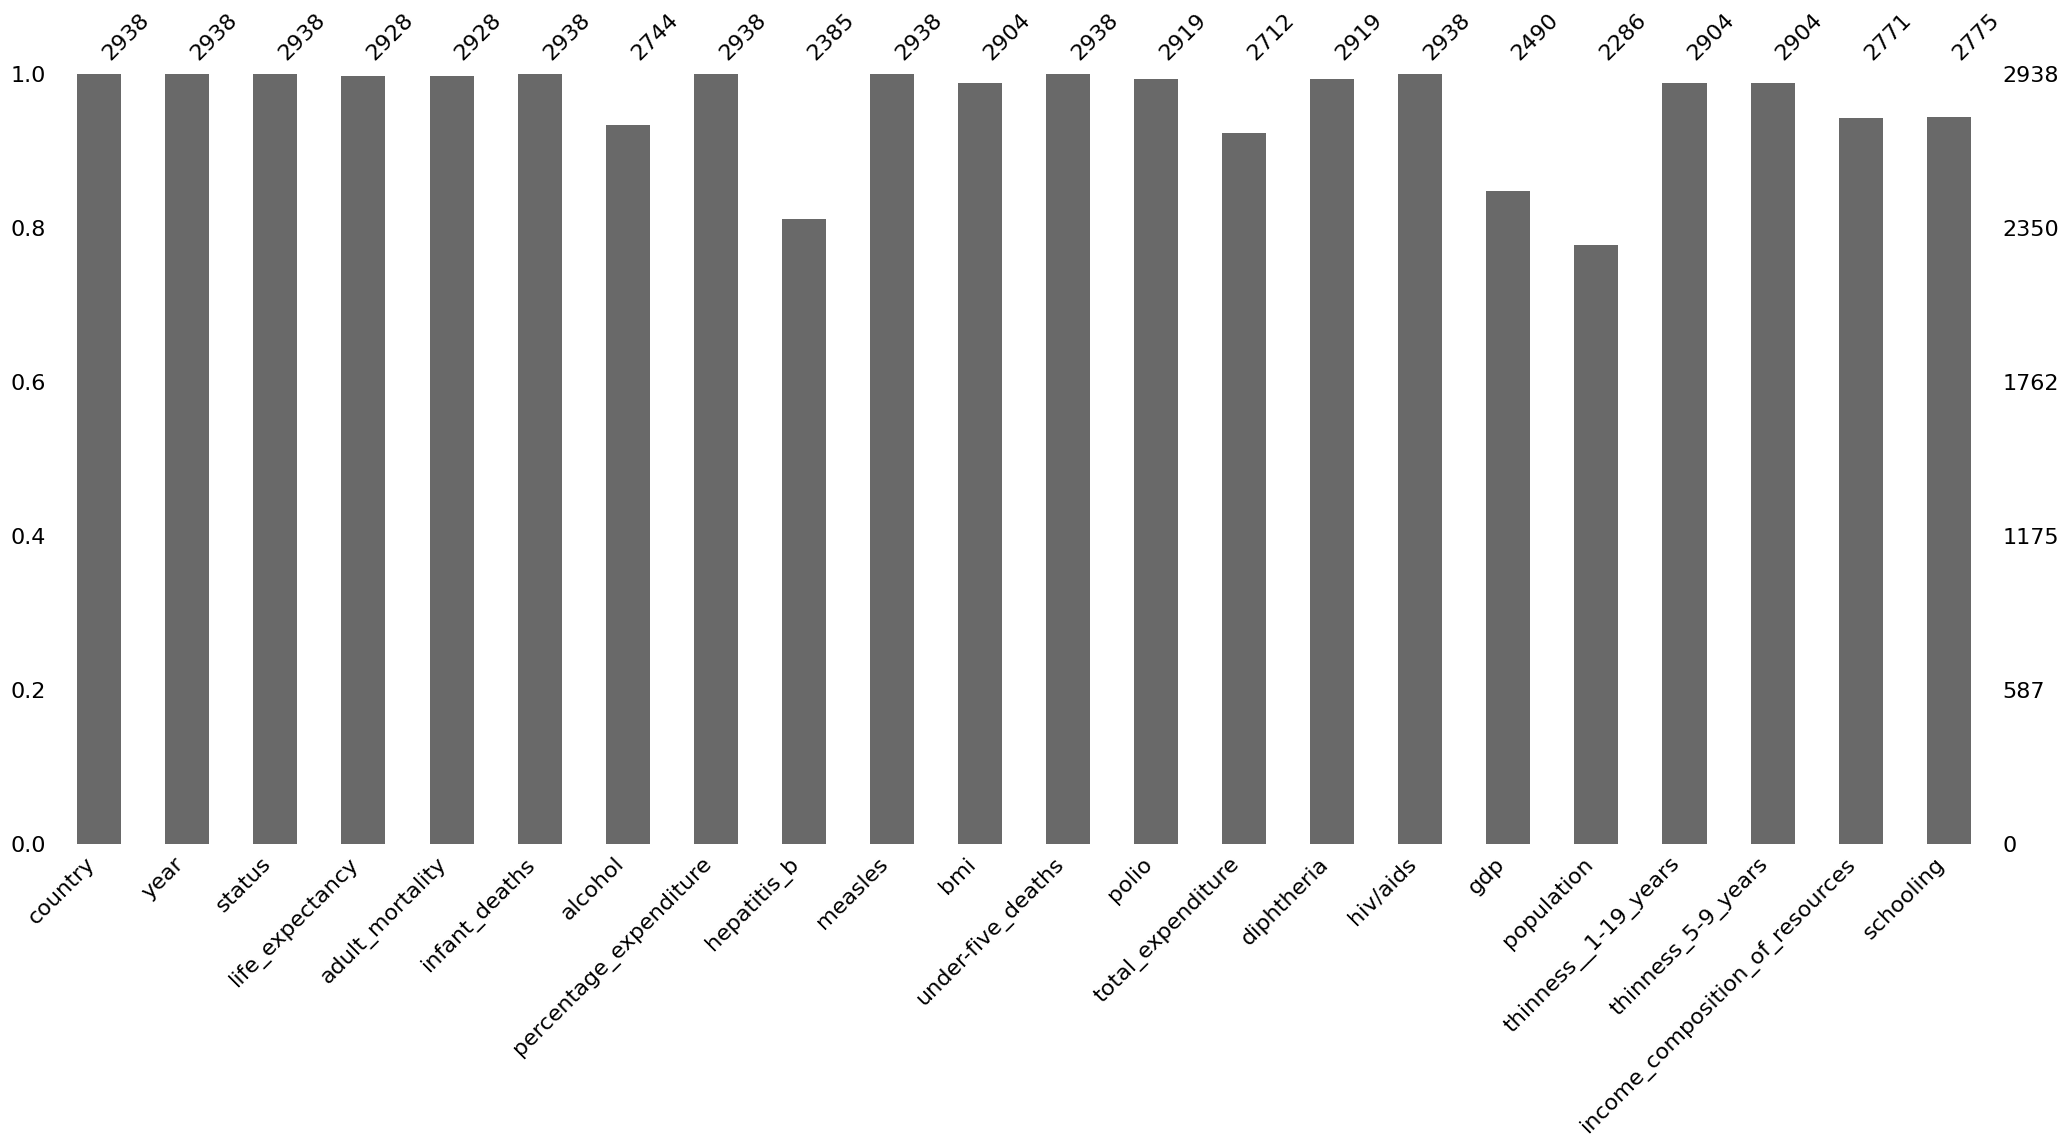

In [12]:
msno.bar(data)   # Check for the null values by graph

<Axes: >

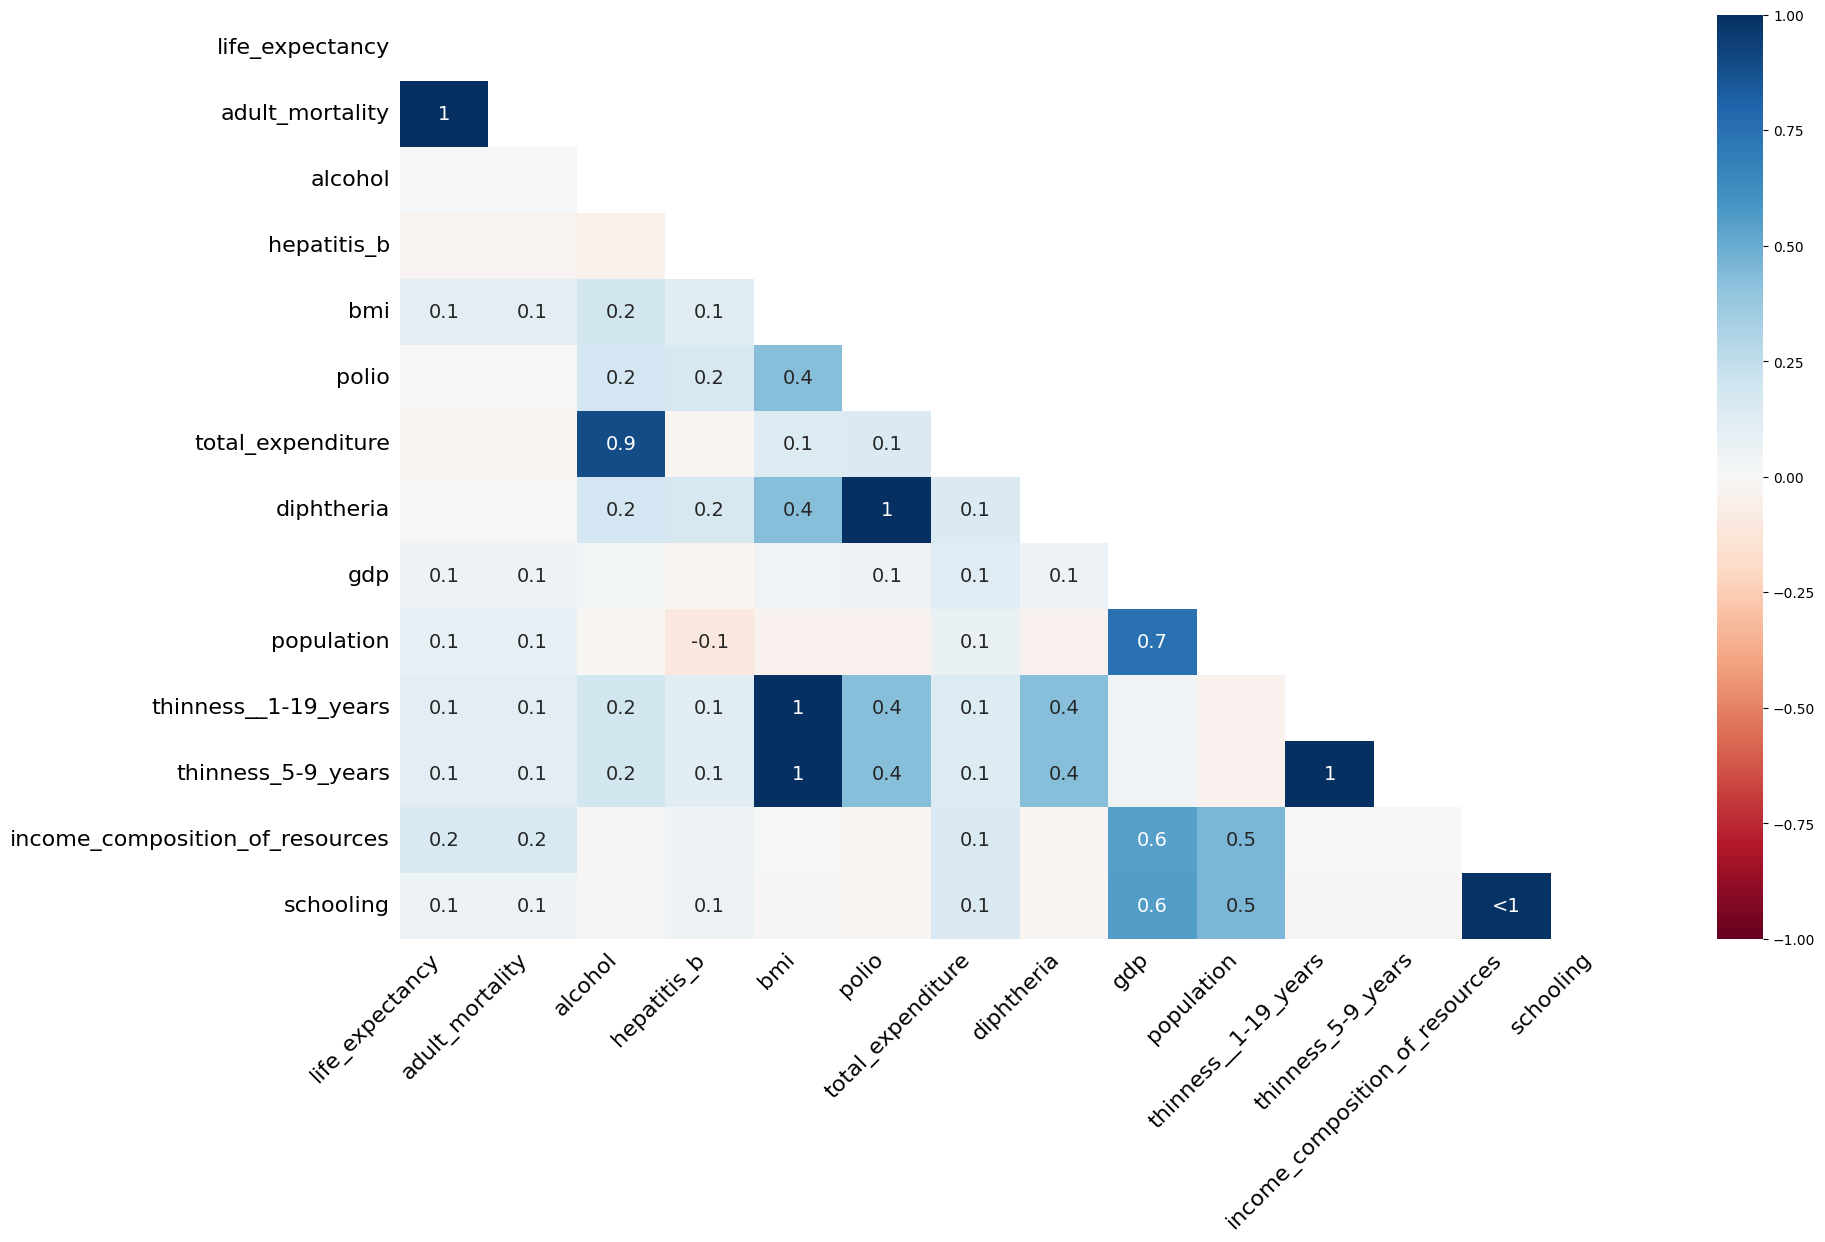

In [13]:
msno.heatmap(data)

In [14]:
d = data.isnull().sum()/len(data)*100
d.sort_values(ascending=False)               # percentage of null

,0
population,22.191967
hepatitis_b,18.822328
gdp,15.248468
total_expenditure,7.692308
alcohol,6.603131
income_composition_of_resources,5.684139
schooling,5.547992
thinness_5-9_years,1.157250
thinness__1-19_years,1.157250
bmi,1.157250


In [15]:
# Drop null values equal to 1 percentage
data.dropna(subset = {'thinness_5-9_years','thinness__1-19_years','bmi','polio','diphtheria','life_expectancy','adult_mortality'},inplace=True)

In [16]:
for cols in data.columns:
  if data[cols].isnull().sum()>0:
    print(cols)

alcohol
hepatitis_b
total_expenditure
gdp
population
income_composition_of_resources
schooling


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=None)
for cols in data.columns:
  if data[cols].isnull().sum()>0:
    data[cols] = imputer.fit_transform(data[[cols]])

In [18]:
data.isnull().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
percentage_expenditure,0
hepatitis_b,0
measles,0


# **Outliers**

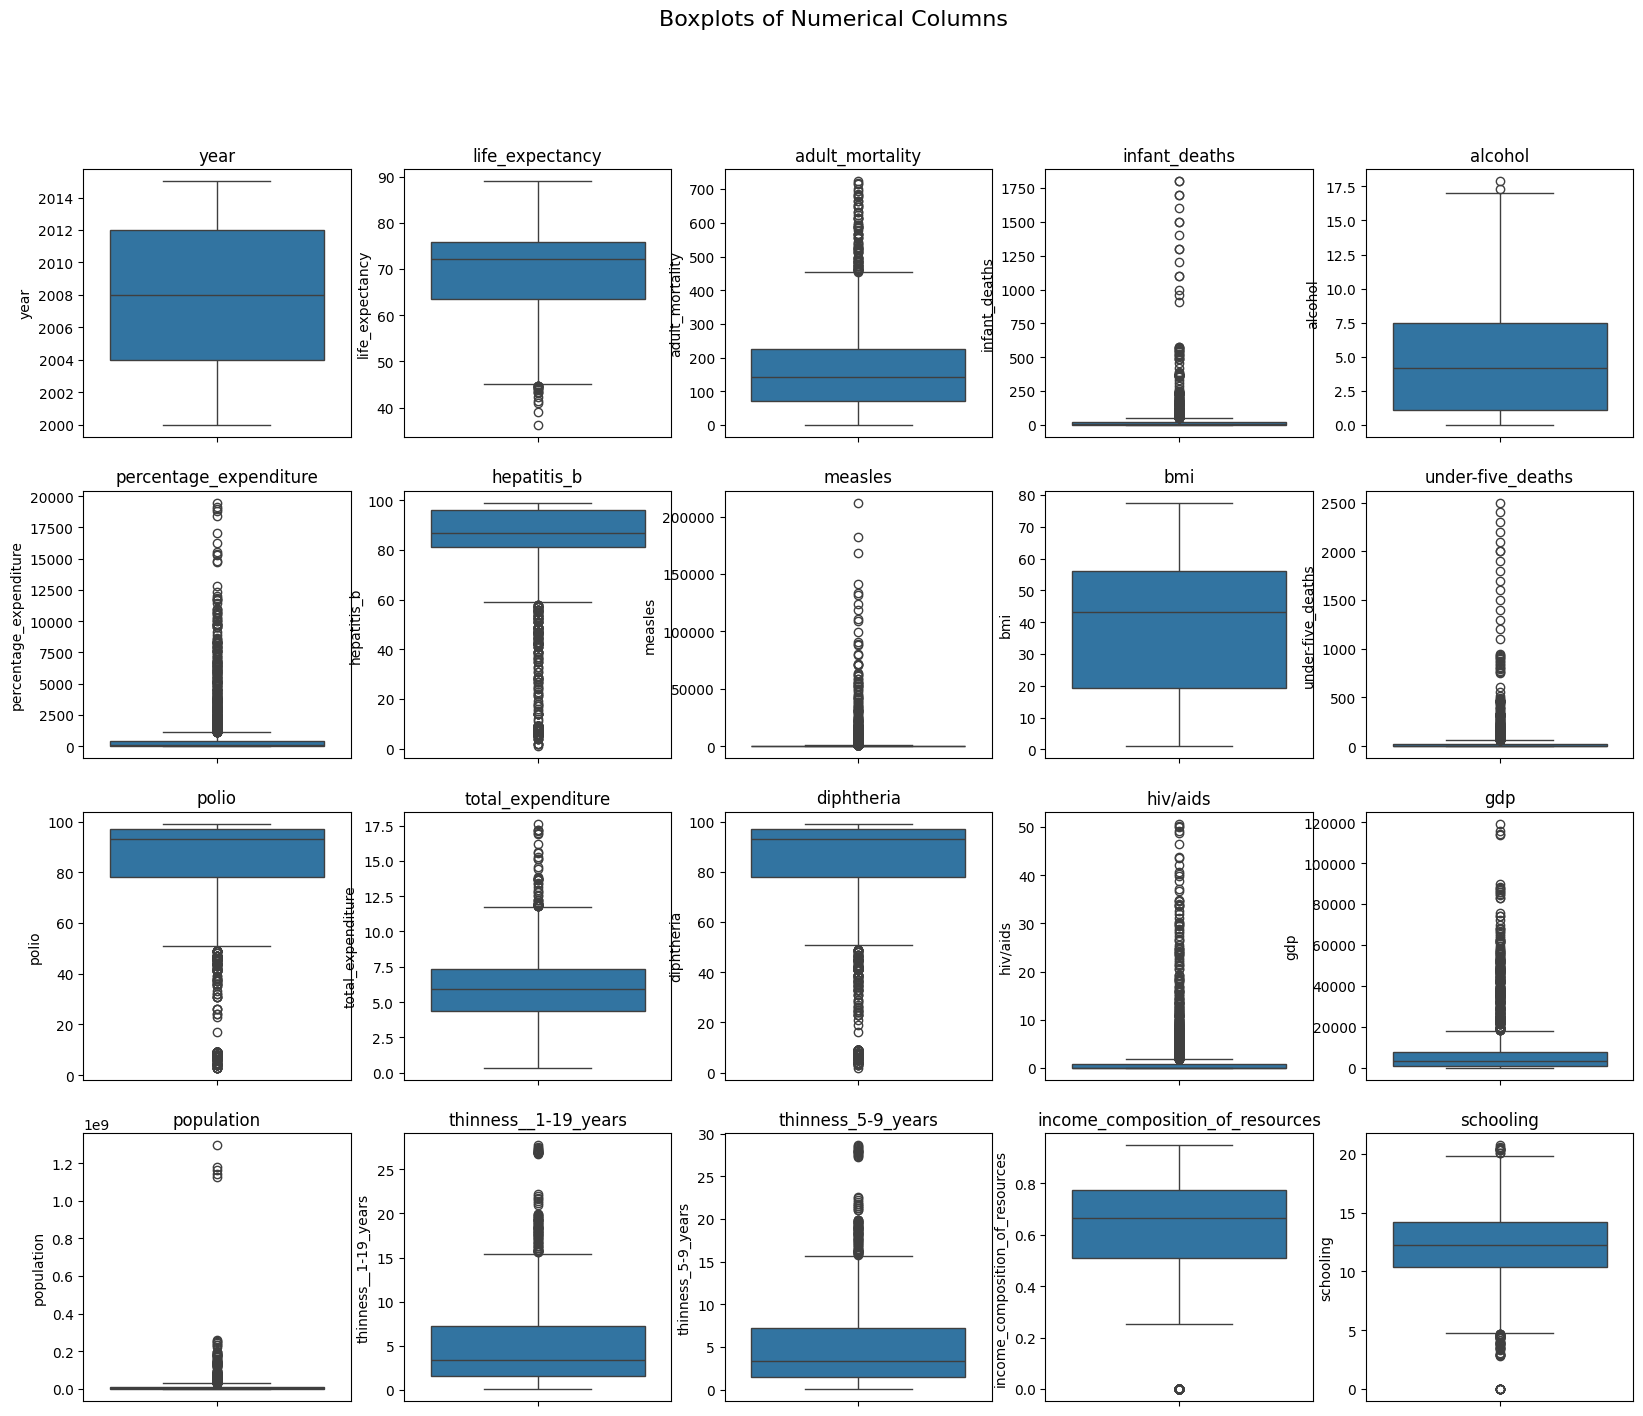

In [19]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=data[col], ax=axes[i])
  axes[i].set_title(col)

In [20]:
# Specify the list of columns you want to handle outliers for
outlier_cols = ['adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitis_b','measles','under-five_deaths','polio','total_expenditure','diphtheria','hiv/aids','gdp','population','thinness__1-19_years','thinness_5-9_years','income_composition_of_resources','schooling']
# Perform outlier handling for each specified column
for col_name in outlier_cols:
  q1 = data[col_name].quantile(0.25)   # Calculate quartiles and IQR
  q3 = data[col_name].quantile(0.75)
  iqr = q3 - q1
# Define the lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  data[col_name] = np.where(data[col_name] < lower_bound, lower_bound, data[col_name])
  data[col_name] = np.where(data[col_name] > upper_bound, upper_bound, data[col_name])   # Replace outliers with the mean value of the column


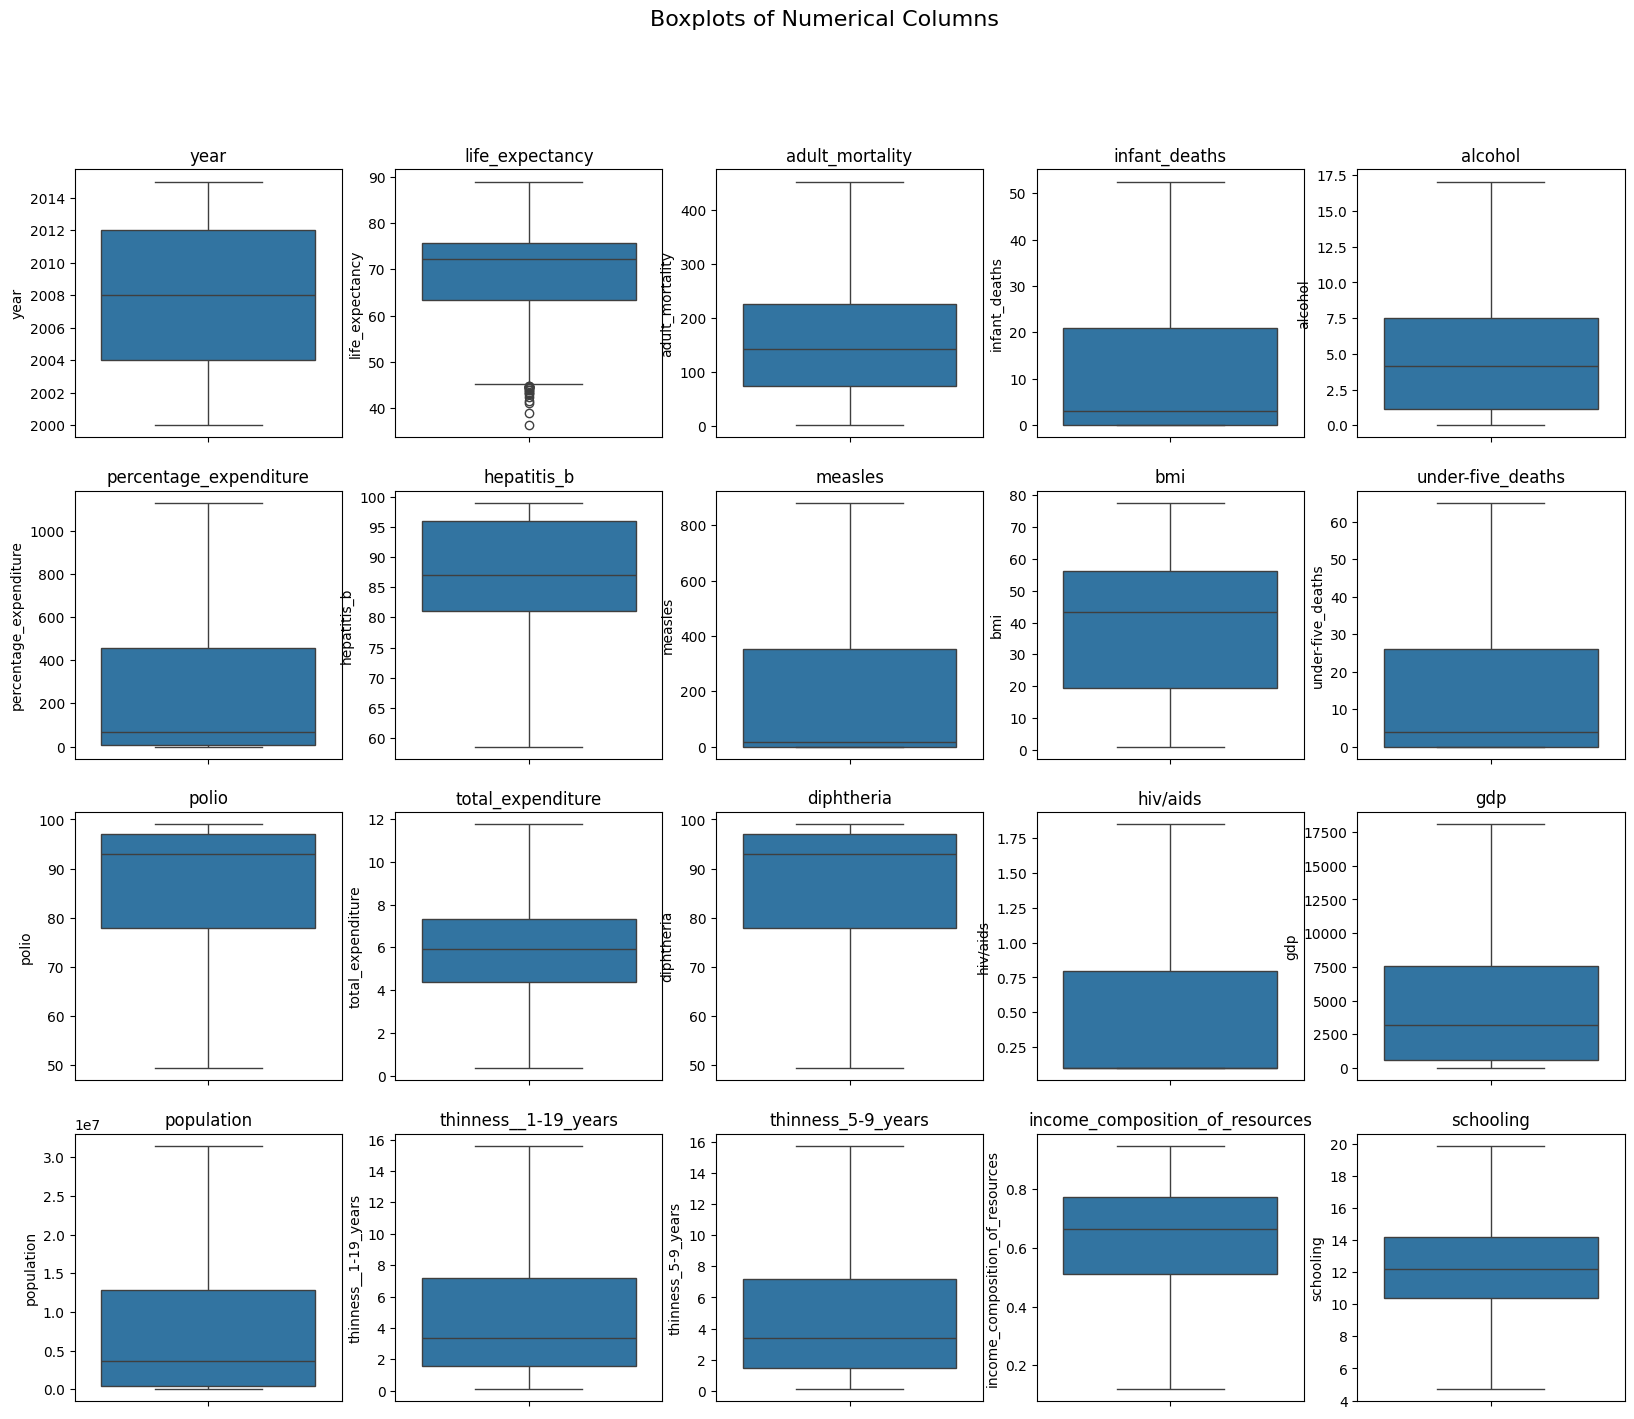

In [21]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=data[col], ax=axes[i])
  axes[i].set_title(col)

# **Exploratory Data Analysis (EDA)**

In [22]:
data.describe(include = 'all')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2888,2888.000000,2888,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.00000,2888.000000,2888.000000,2888.000000,2888.000000,2.888000e+03,2888.000000,2888.000000,2888.000000,2888.000000
unique,181,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.515235,NaN,69.349377,160.432479,13.134176,4.643465,291.619193,84.731012,228.990305,...,85.39491,5.900653,85.342105,0.533241,5221.414007,7.696963e+06,4.721745,4.737639,0.637215,12.141520
std,NaN,4.606938,NaN,9.495441,114.960014,18.366645,3.927569,400.130060,12.785713,345.824982,...,15.80775,2.288780,15.783794,0.691292,5685.608071,8.909582e+06,3.973551,4.009365,0.186505,3.021733
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,58.555015,0.000000,...,49.50000,0.370000,49.500000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.118375,4.700000
25%,NaN,2004.000000,NaN,63.475000,73.000000,0.000000,1.107500,5.049462,81.022006,0.000000,...,78.00000,4.370000,78.000000,0.100000,579.651825,4.158228e+05,1.600000,1.500000,0.511750,10.400000
50%,NaN,2008.000000,NaN,72.200000,143.000000,3.000000,4.165000,67.687008,87.000000,17.000000,...,93.00000,5.930000,93.000000,0.100000,3156.550182,3.692912e+06,3.350000,3.400000,0.666000,12.200000
75%,NaN,2012.000000,NaN,75.800000,225.000000,21.000000,7.490000,454.422430,96.000000,352.250000,...,97.00000,7.322500,97.000000,0.800000,7576.831245,1.283534e+07,7.200000,7.200000,0.774000,14.200000


# **Data Visualization**

In [23]:
import plotly.express as px


# Calculate the average life expectancy for each year
average_life_expectancy = data.groupby('year')['life_expectancy'].mean().reset_index()
# Create the interactive line plot
fig = px.line(average_life_expectancy,x='year',y='life_expectancy',title='Average Life Expectancy over the Years',labels={'Year':'Year', 'life_expectancy':'Life Expectancy (years)'})
# Show the plot
fig.show()

In [24]:
# Create the interactive scatter plot
fig = px.scatter(data, x='population', y='life_expectancy',hover_name='country',color='status',animation_frame='year',title='Population vs Life Expectancy',labels={'population':'Population', 'life_expectancy':'Life Expectancy (years)'})
# Show the plot
fig.show()

In [25]:
life_expact_status = data.groupby('status')['life_expectancy'].mean().reset_index()
fig = px.histogram(life_expact_status, x = 'status', y='life_expectancy',color='status',title = 'Average Life Expactancy for Status of Country')
fig.show()

In [26]:
fig = px.bar(data.groupby('status',as_index=False).agg({'alcohol':'mean'}), y='alcohol',x='status',
             title='Average Alcohol consumption of Developing and Developed Countries',
             labels={'alcohol':'Alcohol Consumption (litersper capita)', 'life_expectancy':'Life Expectancy (years)'})
# Show the plot
fig.show()

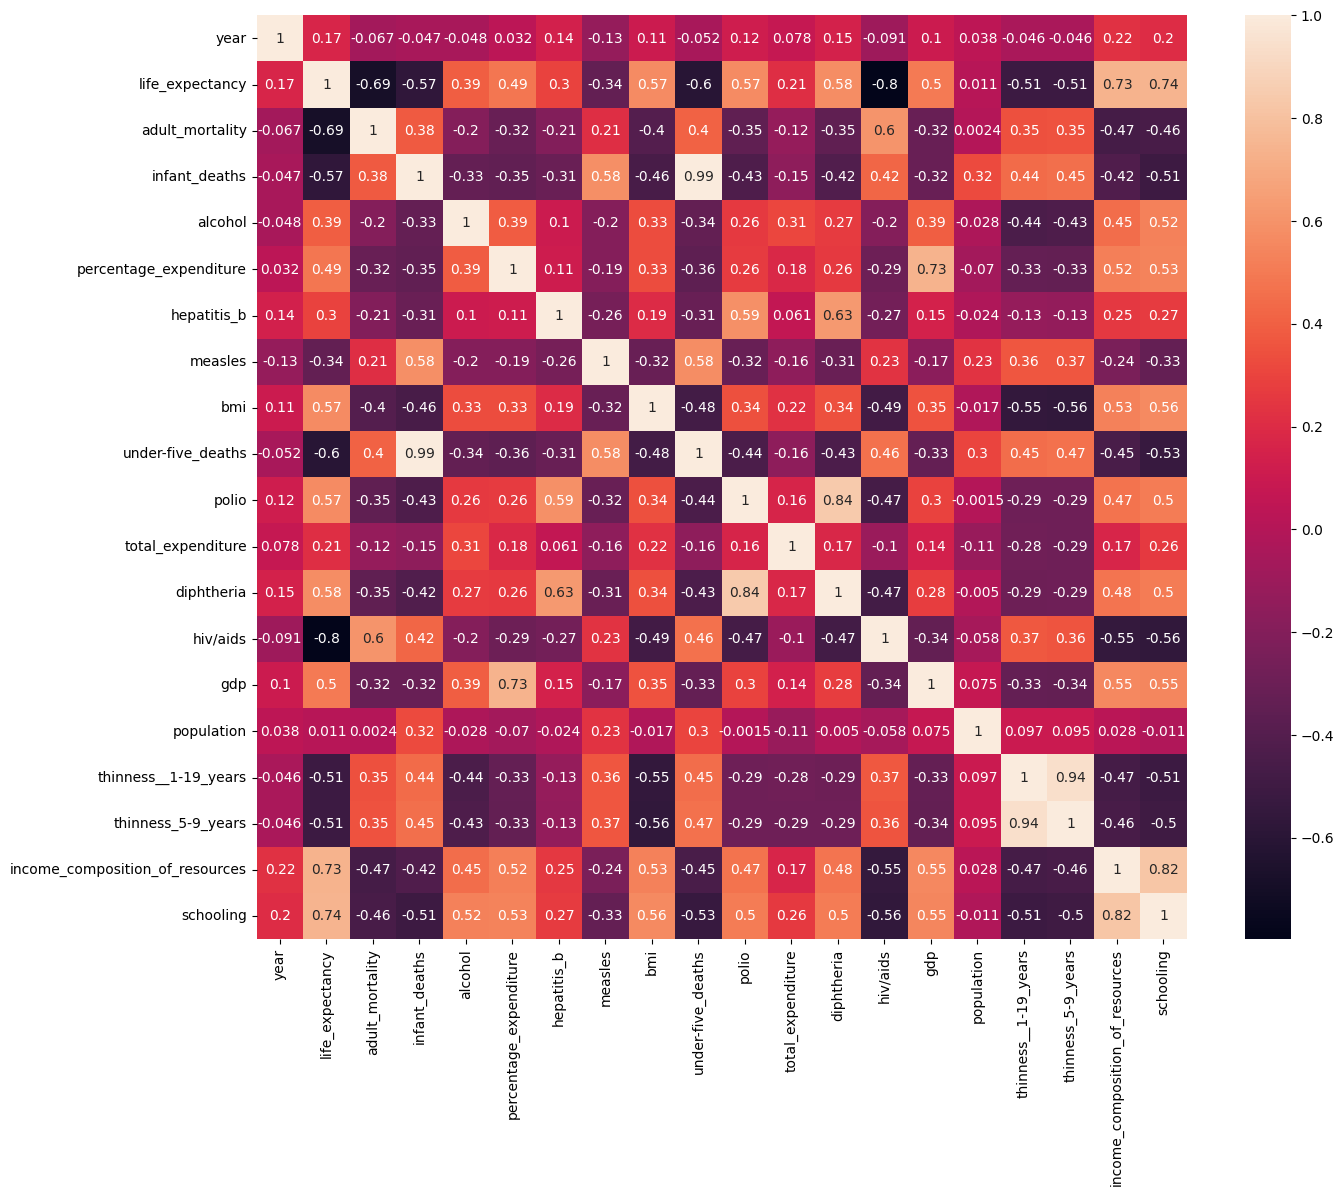

In [27]:
plt.figure(figsize=(15, 12))
sns.heatmap(data[numerical_cols].corr(),annot=True)
plt.show()

# **Data Preprocessing**

In [28]:
# Encode the categorical columns

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# **Data Splitting & Scaling**

In [29]:
# Split the data

from sklearn.model_selection import train_test_split

X = data.drop(columns='life_expectancy')
y = data['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Development**

In [31]:
# Train a Linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score :",r2_score(y_test, y_pred))

MAE : 2.691210707815479
MSE : 12.566089773631836
RMSE : 3.5448680897364624
R2_score : 0.8607933650220789


In [32]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score :",r2_score(y_test, y_pred))

MAE : 1.1561297577854681
MSE : 3.964022468858128
RMSE : 1.9909853010150849
R2_score : 0.9560867191937047


In [33]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score :",r2_score(y_test, y_pred))

MAE : 1.1925002206980566
MSE : 4.051372995532098
RMSE : 2.0128022743260447
R2_score : 0.9551190535872287


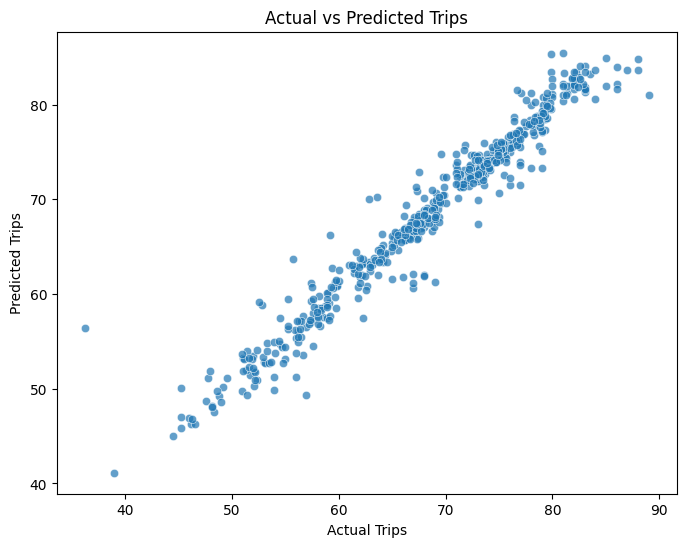

In [34]:
# Visualization of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips")
plt.show()

# **Conclusion**

**Key Findings :**

Economic Factors: Countries with higher GDP and income per capita tend to have higher life expectancy.

Healthcare Impact: Better healthcare expenditure and immunization coverage positively correlate with increased life expectancy.

Lifestyle & Diseases: Higher prevalence of HIV/AIDS, obesity, and alcohol consumption negatively impacts life expectancy.

Environmental & Social Factors: Sanitation, education levels, and government health policies significantly influence public health and longevity.

Developing vs. Developed Nations: Life expectancy is generally lower in low-income countries due to limited healthcare access, malnutrition, and disease outbreaks.

**Model Performance :**

The RandomForestRegressor predictive model accurately estimated life expectancy based on socio-economic and health indicators.

Key factors influencing predictions included GDP, immunization, adult mortality rate, and healthcare spending.

**Business Recommendations :**

✅ Increase healthcare funding to improve medical infrastructure and accessibility.

✅ Promote vaccinations & preventive care to reduce mortality rates from infectious diseases.

✅ Enhance education & awareness on healthy lifestyles, sanitation, and disease prevention.

✅ Encourage balanced economic growth to improve healthcare access in low-income regions.